In [4]:
#libraries that we might need
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import tensorflow
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import math
from math import log
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt

In [5]:
domain = []
for i in range(0,800):
  domain.append(i/1000)
test_domain = []
for i in range(800,1001):
  test_domain.append(i/1000)

In [6]:
def timeseries(f):
  series = []
  for i in domain:
    series.append(f(i))
  return series

In [7]:
seed = 3

#returns the RMSE, percent of variance explained and the L2 norm of the data
def function_info (function):
  #model for the data
  tensorflow.random.set_seed(seed)
  model1 = Sequential()
  model1.add(Dense(3000, input_dim=1, activation='relu')) # Hidden 1
  model1.add(Dense(1500, activation='relu')) # Hidden 2
  model1.add(Dense(1)) # Output
  model1.compile(loss='mean_squared_error', optimizer='adam')
  #fits the model based on the input function
  model1.fit(domain,timeseries(function),verbose=2,epochs=16)


  #processes the data for the model

  pred1 = model1.predict(test_domain)
  y1 = np.array(list(map(function, test_domain)))
  score1 = np.sqrt(metrics.mean_squared_error(pred1, y1))
  pvariance1 = (y1.std()-score1)/y1.std()
  
  #calculates the l2 norm

  sum = 0
  n = len(y1)
  for i in range (n-1):
    sum += (y1[i+1]-y1[i])**2

  sum = sum/n

  sum = np.sqrt(sum)

  return score1, pvariance1, sum

In [8]:
function_array = []

for i in range(1,11):
  f = lambda x, i=i : (np.sin(1/x))*(x**(1+(1/i))) if x!=0 else 0
  function_array.append(f)

for i in function_array:
  print(i(1/2))

0.22732435670642043
0.32148518831195905
0.36085492297376603
0.38231247330857127
0.3957946935634067
0.4050459559836544
0.41178609866514904
0.4169147084373769
0.42094774672290075
0.4242022491739435


In [9]:
all_those_results = np.array(list(map(function_info, function_array)))
all_those_results

Epoch 1/16
25/25 - 3s - loss: 0.0103 - 3s/epoch - 108ms/step
Epoch 2/16
25/25 - 0s - loss: 3.8496e-04 - 62ms/epoch - 2ms/step
Epoch 3/16
25/25 - 0s - loss: 6.8042e-05 - 59ms/epoch - 2ms/step
Epoch 4/16
25/25 - 0s - loss: 2.5393e-05 - 58ms/epoch - 2ms/step
Epoch 5/16
25/25 - 0s - loss: 1.7895e-05 - 62ms/epoch - 2ms/step
Epoch 6/16
25/25 - 0s - loss: 1.4335e-05 - 64ms/epoch - 3ms/step
Epoch 7/16
25/25 - 0s - loss: 1.3128e-05 - 60ms/epoch - 2ms/step
Epoch 8/16
25/25 - 0s - loss: 1.2337e-05 - 60ms/epoch - 2ms/step
Epoch 9/16
25/25 - 0s - loss: 1.1605e-05 - 60ms/epoch - 2ms/step
Epoch 10/16
25/25 - 0s - loss: 1.0849e-05 - 59ms/epoch - 2ms/step
Epoch 11/16
25/25 - 0s - loss: 1.0305e-05 - 56ms/epoch - 2ms/step
Epoch 12/16
25/25 - 0s - loss: 9.9558e-06 - 57ms/epoch - 2ms/step
Epoch 13/16
25/25 - 0s - loss: 9.7155e-06 - 60ms/epoch - 2ms/step
Epoch 14/16
25/25 - 0s - loss: 9.6092e-06 - 56ms/epoch - 2ms/step
Epoch 15/16
25/25 - 0s - loss: 9.5659e-06 - 54ms/epoch - 2ms/step
Epoch 16/16
25/25 - 0s 

array([[ 1.78595882e-02,  7.36963615e-01,  1.16781785e-03],
       [ 5.15346654e-02, -9.54607943e-02,  8.12144048e-04],
       [ 6.42752508e-02, -6.24621002e-01,  6.84911854e-04],
       [ 7.27433081e-02, -1.03655489e+00,  6.19586555e-04],
       [ 7.55773108e-02, -1.26426821e+00,  5.79838875e-04],
       [ 7.83411912e-02, -1.46327808e+00,  5.53110150e-04],
       [ 7.36659345e-02, -1.40174070e+00,  5.33905755e-04],
       [ 7.35203302e-02, -1.46553314e+00,  5.19441214e-04],
       [ 8.13467341e-02, -1.79026320e+00,  5.08154879e-04],
       [ 7.60478711e-02, -1.65716028e+00,  4.99103143e-04]])

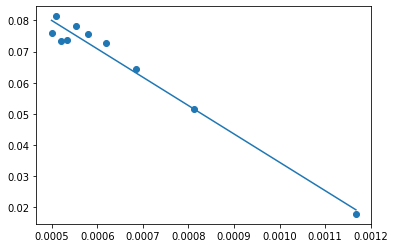

In [14]:
loss = []
var = []
for i in all_those_results:
  rmse, pove, l2 = i
  loss.append(rmse)
  var.append(l2)

nploss = np.array(loss)
npvar = np.array(var)

plt.scatter(npvar,nploss)
a, b = np.polyfit(npvar, nploss, 1)
plt.plot(npvar, a*npvar + b)
plt.show()